# Locally Weighted Logistic Regression
CS229 Pset 1 Problem 2

(69, 2)
(69,)


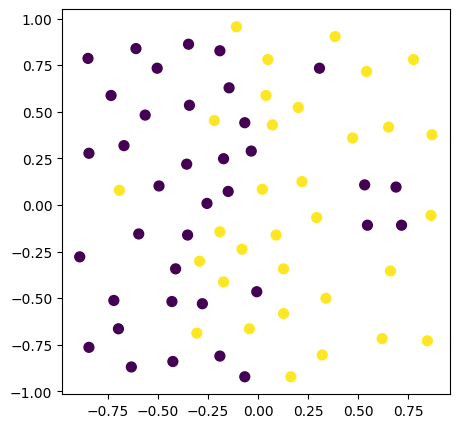

In [1]:
import numpy as np
import matplotlib.pyplot as plt

with open("data/x.dat", "r") as f:
    X_train = np.array([[float(x) for x in line.split()] for line in f.readlines()], dtype=np.float64)
print(X_train.shape)

with open("data/y.dat", "r") as f:
    y_train = np.array([float(x) for x in f.readlines()], dtype=np.float64)
print(y_train.shape)

plt.figure(figsize=(5, 5))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap="viridis");

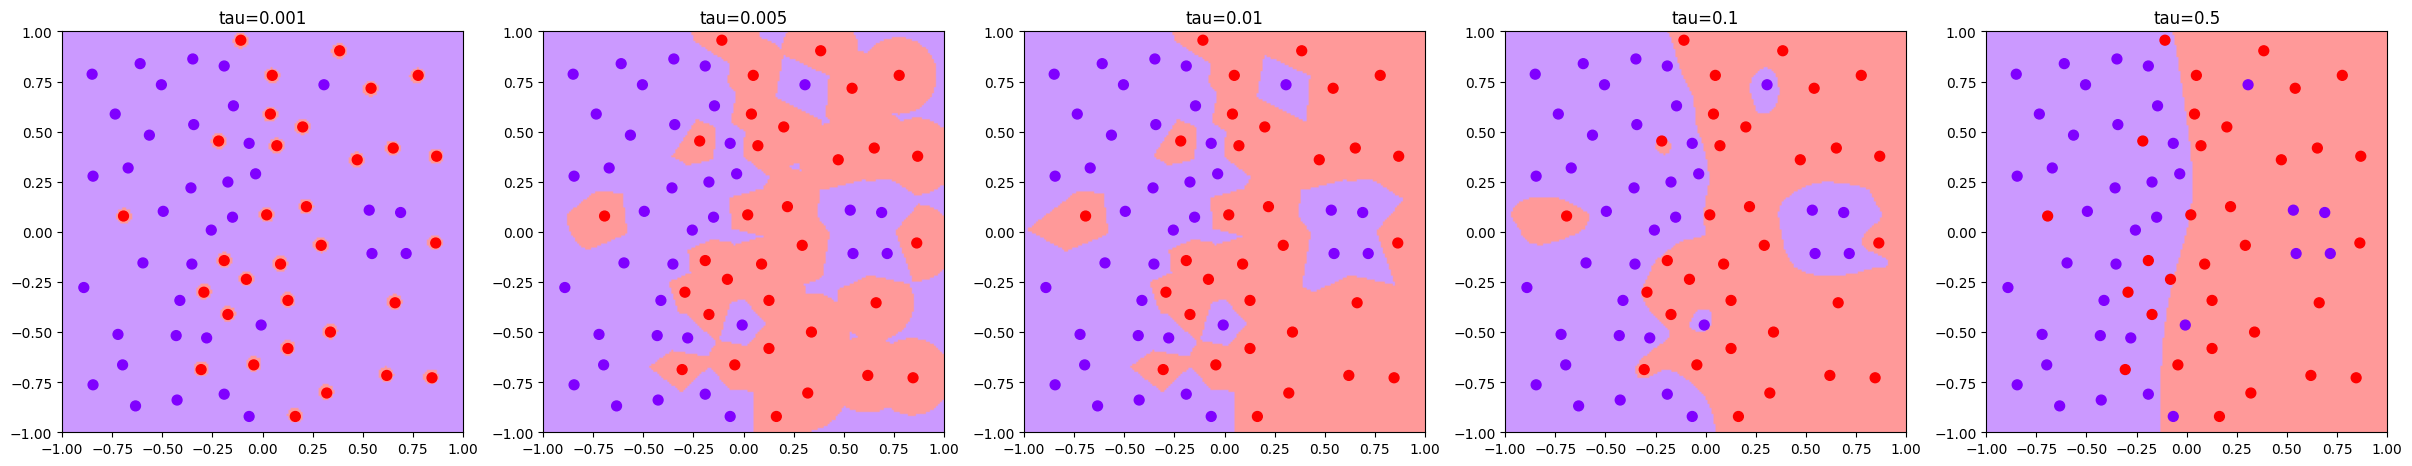

In [2]:
import numpy.linalg as LA
from matplotlib.axes import Axes

def sigmoid(x: np.ndarray) -> np.ndarray:
    """Compute element-wise sigmoid."""
    z = 1 / (1 + np.exp(-x))
    return z

def lwlr(X_train: np.ndarray, y_train: np.ndarray, x: np.ndarray, tau: float, lmbda: float = 0.0001) -> int:
    """Use locally weighted logistic regression to classify x."""
    theta = np.zeros(X_train.shape[1], dtype=np.float64)

    dx = ((X_train - x) ** 2).sum(axis=-1)
    w = np.exp(-dx / (2 * tau**2))

    grad = np.ones_like(theta)
    while LA.norm(grad) > 1e-6:
        h = sigmoid(X_train @ theta)
        z = w * (y_train - h)
        grad = (X_train.T @ z) - (lmbda * theta) 

        w_diag = -w * h * (1 - h)
        hessian = (X_train.T @ (w_diag[:, None] * X_train)) - (lmbda * np.eye(theta.shape[0], dtype=np.float64))

        theta -= LA.solve(hessian, grad)

    y_logit = x.dot(theta)
    return int(y_logit > 0)

def plot_preds(X_train: np.ndarray, y_train: np.ndarray, n_points: int, tau: float, ax: Axes) -> None:
    """Plot lwlr predictions with given tau."""
    y_preds = []

    vals = np.linspace(-1, 1, num=n_points, dtype=np.float64)
    X_new = np.stack(np.meshgrid(vals, vals), axis=0)

    x1s = X_new[0].flat
    x2s = X_new[1].flat

    for x1, x2 in zip(x1s, x2s):
        x = np.array([x1, x2], dtype=np.float64)
        y_pred = lwlr(X_train, y_train, x, tau)
        y_preds.append(y_pred)

    ax.imshow(np.array(y_preds).reshape(n_points, n_points), origin="lower", cmap="rainbow", alpha=0.4, extent=(-1, 1, -1, 1))
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap="rainbow")
    ax.set_title(f"tau={tau}")


taus = [0.001, 0.005, 0.01, 0.1, 0.5]
fig, axs = plt.subplots(nrows=1, ncols=len(taus), figsize=(6 * len(taus), 6))
for tau, ax in zip(taus, axs):
    plot_preds(X_train, y_train, n_points=200, tau=tau, ax=ax)